<a href="https://colab.research.google.com/github/kylelee417/Data-Science_Portfolio/blob/master/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#source:https://darektidwell.com/using-selenium-with-google-colaboratory/
# Install cromium, its driver, and selenium
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

# Set options to be headless
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.webite-url.com")

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# New Section

In [0]:
!pip install google_images_download

  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download
import os
ori_path = os.getcwd()
data_path = os.path.join(ori_path,'downloads')
data_path

'/content/downloads'

In [0]:
#creating object
response = google_images_download.googleimagesdownload()

search_queries = ['man hairstyle top view',
                 'women hairstyle top view']


In [0]:
def downloadimages(query):
    arguments = dict(keywords=query,
                    limit=1000,
                    format='jpg',
                    size = 'medium',
                    chromedriver= '/usr/lib/chromium-browser/chromedriver',
                    aspect_ratio='square',
                    silent_mode=True)
    try: 
        response.download(arguments)     
    except FileNotFoundError:  
        arguments = dict(keywords=query,
                    limit=20,
                    format='jpg',
                    size = 'medium',     
                    aspect_ratio='square',
                    print_urls=False)                       
        try:  
            response.download(arguments)  
        except: 
            pass

In [0]:
# Driver Code 

download_msg = []
for query in search_queries: 
    downloadimages(query)
    msg = 'Downloaded {} {} images!'.format(len(os.listdir(os.path.join(data_path,query))),query)
    download_msg.append(msg)
for msg in download_msg:
    print(msg)

In [0]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob #retriving an array of files in directories
from keras.models import Sequential #for neural network models
from keras.layers import Input, Dense, Flatten,Conv2D, ZeroPadding2D, MaxPooling2D, Dropout # Import hidden layer
from keras.optimizers import Adam #For Optimizing the Neural Network
from keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model

In [0]:

men_hair = "/content/drive/My Drive/downloads/"
women_hair = "/content/drive/My Drive/downloads/"

In [0]:
men_hair

'/content/drive/My Drive/downloads/'

In [0]:
img_all_train = glob(men_hair+"/man hairstyle top view/train/*.jpg")
img_all_train += glob(women_hair+"women hairstyle top view/train/*.jpg") 

img_all_test = glob(men_hair+"/man hairstyle top view/test/*.jpg")
img_all_test += glob(women_hair+"women hairstyle top view/test/*.jpg") 


In [0]:
#source:https://www.kaggle.com/aakashnain/beating-everything-with-depthwise-convolution
# Preparing train, test data


train_data = []
test_data = []

#Train
for img in img_all_train:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    img = img.astype(np.float32)/255.
    train_data.append(img)
    
#Test                      
for img in img_all_test:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    img = img.astype(np.float32)/255.
    test_data.append(img)
    

train_data = np.array(train_data)
test_data = np.array(test_data)

print("Total number of train examples: ", train_data.shape)
print("Total number of test examples:", test_data.shape)

Total number of train examples:  (1130, 224, 224, 3)
Total number of test examples: (303, 224, 224, 3)


(1130, 224, 224, 3)

In [0]:
#Source:https://blog.keras.io/building-autoencoders-in-keras.html
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(150528,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(150528, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [0]:
#separate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
#separate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
#we will flatten the 28x28 images into vectors of size 784
x_train = train_data.reshape(len(train_data),np.prod(x_train.shape[1:]))
x_test = test_data.reshape(len(test_data),np.prod(x_train.shape[1:]))
print (x_train.shape)
print (x_test.shape)

(1130, 150528)
(303, 150528)


In [0]:
len(train_data)

1130

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=16,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 1130 samples, validate on 303 samples
Epoch 1/50
1130/1130 [==============================] - 3s 3ms/step - loss: 0.6925 - val_loss: 0.6914
Epoch 2/50
1130/1130 [==============================] - 3s 2ms/step - loss: 0.6910 - val_loss: 0.6895
Epoch 3/50
1130/1130 [==============================] - 3s 2ms/step - loss: 0.6895 - val_loss: 0.6879
Epoch 4/50
1130/1130 [==============================] - 3s 2ms/step - loss: 0.6883 - val_loss: 0.6865
Epoch 5/50
1130/1130 [==============================] - 3s 2ms/step - loss: 0.6874 - val_loss: 0.6854
Epoch 6/50
1130/1130 [==============================] - 3s 2ms/step - loss: 0.6866 - val_loss: 0.6844
Epoch 7/50
1130/1130 [==============================] - 3s 2ms/step - loss: 0.6860 - val_loss: 0.6836
Epoch 8/50
1130/1130 [==============================] - 3s 2ms/step - loss: 0.6855 - val_loss: 0.6830
Epoch 9/50
1130/1130 [==============================] - 3s 2ms/step - loss: 0.6852 - val_loss: 0.6826
Epoch 10/50
1130/1130 [============

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


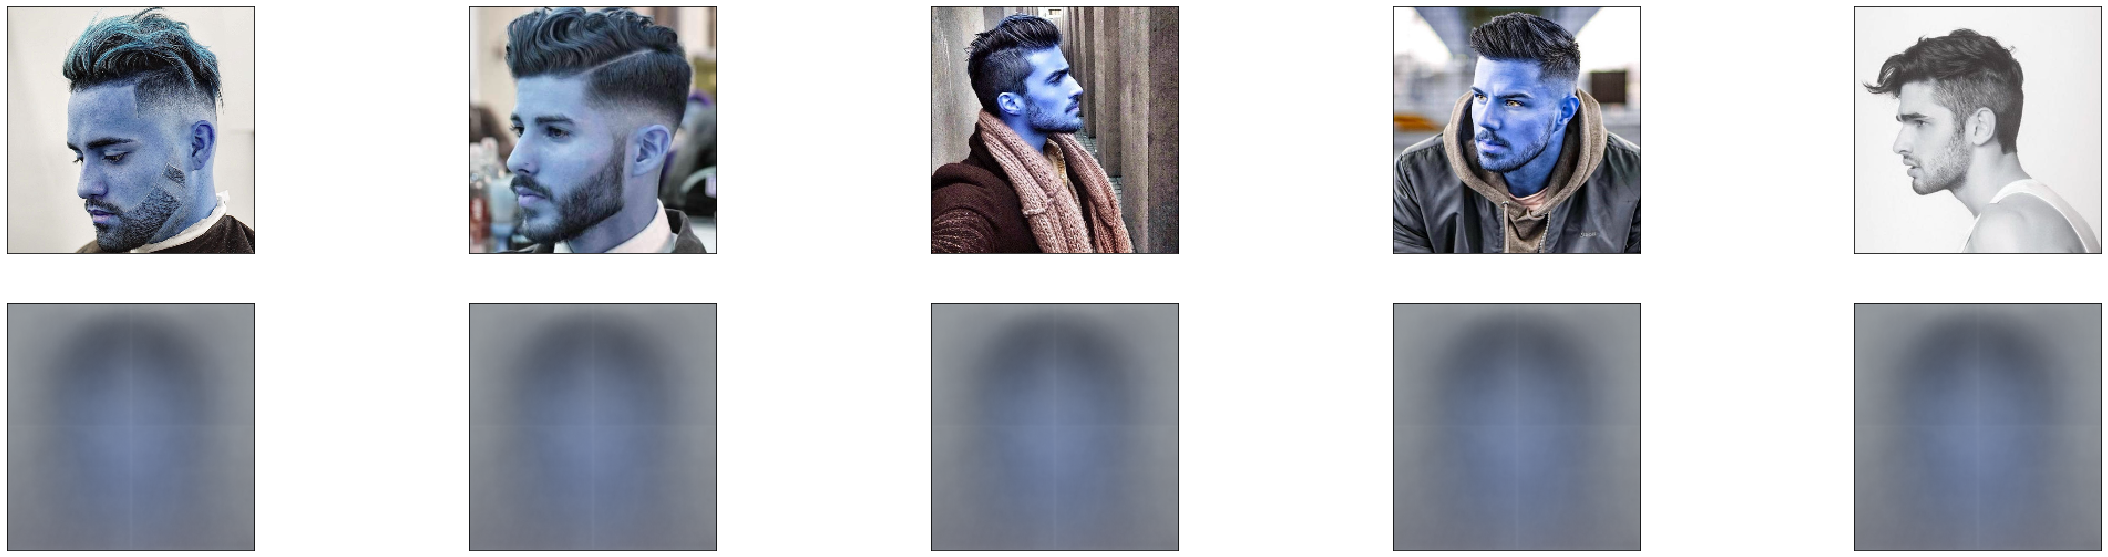

In [0]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 5  # how many digits we will display
plt.figure(figsize=(40, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(224,224,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(224, 224,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()